# Twice Members Recognition

In [2]:
import boto3
from PIL import Image

%matplotlib inline

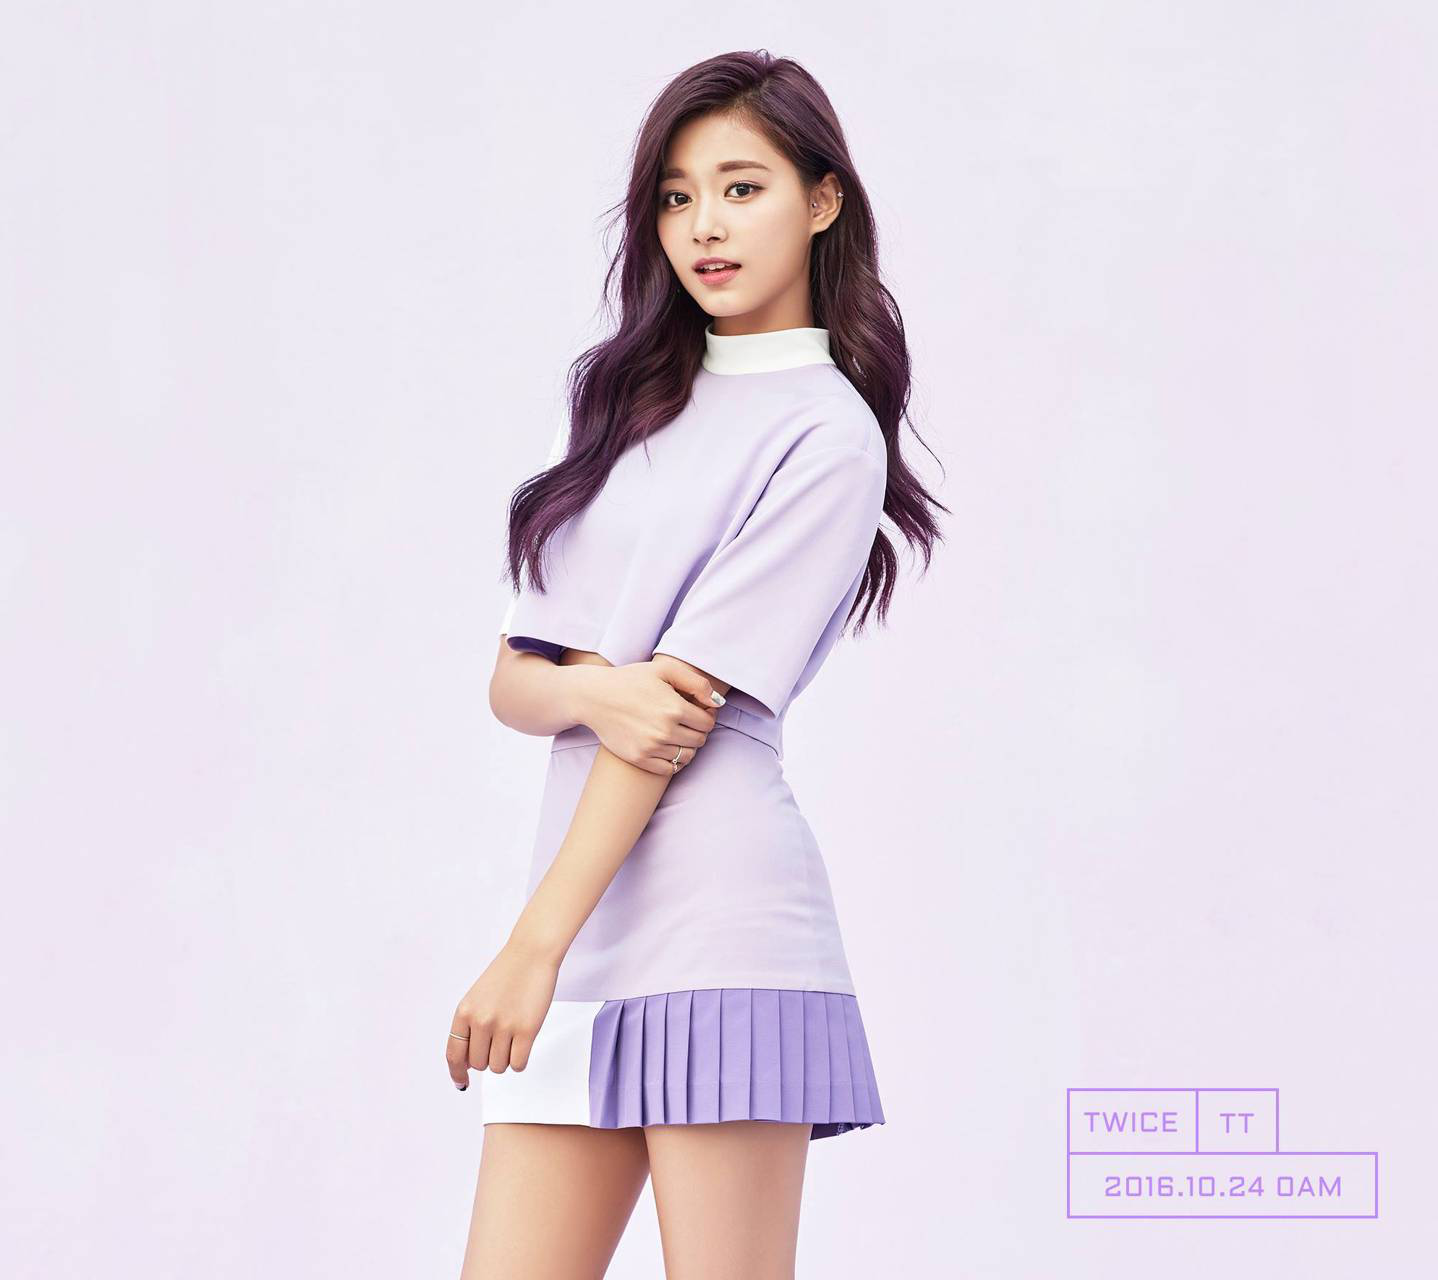

In [3]:
display(Image.open('Tzuyu.jpeg'))

# Detect Faces

In [4]:
import io

rekognition = boto3.client('rekognition')

sourceFile='Tzuyu.jpeg'   
imageSource=open(sourceFile,'rb')

rekognition.detect_faces(
Image={'Bytes':imageSource.read()},
    Attributes=['ALL']
)

{'FaceDetails': [{'AgeRange': {'High': 38, 'Low': 20},
   'Beard': {'Confidence': 99.99065399169922, 'Value': False},
   'BoundingBox': {'Height': 0.1580781191587448,
    'Left': 0.454618364572525,
    'Top': 0.0879983901977539,
    'Width': 0.10018708556890488},
   'Confidence': 100.0,
   'Emotions': [{'Confidence': 3.3034584522247314, 'Type': 'DISGUSTED'},
    {'Confidence': 26.838565826416016, 'Type': 'CALM'},
    {'Confidence': 3.7570080757141113, 'Type': 'SAD'},
    {'Confidence': 19.28465461730957, 'Type': 'CONFUSED'},
    {'Confidence': 39.519107818603516, 'Type': 'SURPRISED'},
    {'Confidence': 4.999994277954102, 'Type': 'ANGRY'},
    {'Confidence': 2.2972090244293213, 'Type': 'HAPPY'}],
   'Eyeglasses': {'Confidence': 99.98565673828125, 'Value': False},
   'EyesOpen': {'Confidence': 99.98555755615234, 'Value': True},
   'Gender': {'Confidence': 99.88134765625, 'Value': 'Female'},
   'Landmarks': [{'Type': 'eyeLeft',
     'X': 0.4736412763595581,
     'Y': 0.15464401245117188}

# Compare Faces

In [5]:
sourceFile='Tzuyu.jpeg'
targetFile='twice_group.jpg'
   
imageSource=open(sourceFile,'rb')
imageTarget=open(targetFile,'rb')

response = rekognition.compare_faces(SimilarityThreshold=80,
                              SourceImage={'Bytes': imageSource.read()},
                              TargetImage={'Bytes': imageTarget.read()})
response['FaceMatches']

[{'Face': {'BoundingBox': {'Height': 0.21386680006980896,
    'Left': 0.2687722146511078,
    'Top': 0.6712048649787903,
    'Width': 0.13569770753383636},
   'Confidence': 100.0,
   'Landmarks': [{'Type': 'eyeLeft',
     'X': 0.2859487235546112,
     'Y': 0.7461633086204529},
    {'Type': 'eyeRight', 'X': 0.34207218885421753, 'Y': 0.7628777027130127},
    {'Type': 'mouthLeft', 'X': 0.28201237320899963, 'Y': 0.8237659931182861},
    {'Type': 'mouthRight', 'X': 0.32833752036094666, 'Y': 0.8384175896644592},
    {'Type': 'nose', 'X': 0.2933720648288727, 'Y': 0.8006431460380554}],
   'Pose': {'Pitch': -19.738651275634766,
    'Roll': 14.17354965209961,
    'Yaw': -30.295345306396484},
   'Quality': {'Brightness': 87.56075286865234,
    'Sharpness': 83.14741516113281}},
  'Similarity': 97.69600677490234}]

In [6]:
response['FaceMatches'][0]['Face']['BoundingBox']

{'Height': 0.21386680006980896,
 'Left': 0.2687722146511078,
 'Top': 0.6712048649787903,
 'Width': 0.13569770753383636}

In [7]:
response

{'FaceMatches': [{'Face': {'BoundingBox': {'Height': 0.21386680006980896,
     'Left': 0.2687722146511078,
     'Top': 0.6712048649787903,
     'Width': 0.13569770753383636},
    'Confidence': 100.0,
    'Landmarks': [{'Type': 'eyeLeft',
      'X': 0.2859487235546112,
      'Y': 0.7461633086204529},
     {'Type': 'eyeRight', 'X': 0.34207218885421753, 'Y': 0.7628777027130127},
     {'Type': 'mouthLeft', 'X': 0.28201237320899963, 'Y': 0.8237659931182861},
     {'Type': 'mouthRight', 'X': 0.32833752036094666, 'Y': 0.8384175896644592},
     {'Type': 'nose', 'X': 0.2933720648288727, 'Y': 0.8006431460380554}],
    'Pose': {'Pitch': -19.738651275634766,
     'Roll': 14.17354965209961,
     'Yaw': -30.295345306396484},
    'Quality': {'Brightness': 87.56075286865234,
     'Sharpness': 83.14741516113281}},
   'Similarity': 97.69600677490234}],
 'ResponseMetadata': {'HTTPHeaders': {'connection': 'keep-alive',
   'content-length': '6154',
   'content-type': 'application/x-amz-json-1.1',
   'date'

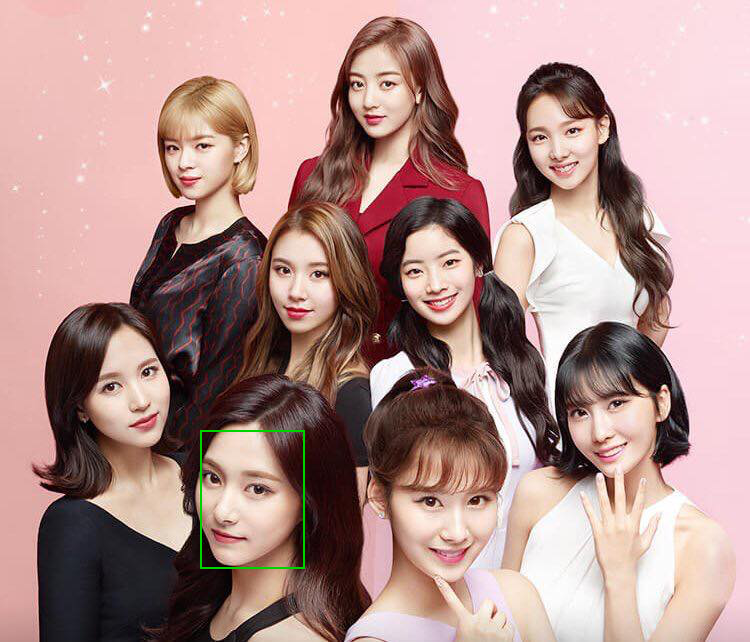

In [9]:
from PIL import ImageDraw

image = Image.open("twice_group.jpg")
image_width, image_height  = image.size  
draw = ImageDraw.Draw(image)
box = response['FaceMatches'][0]['Face']['BoundingBox']
x1 = box['Left'] * image_width
y1 = box['Top'] * image_height
x2 = x1 + box['Width'] * image_width
y2 = y1 + box['Height']  * image_height
points = (
            (x1,y1),
            (x2, y1),
            (x2, y2),
            (x1 , y2),
            (x1, y1)

        )
draw.line(points, fill='#00d400', width=2)

display(image)

# Create Collection

In [10]:
collectionId='test-collection'
rekognition.create_collection(CollectionId=collectionId)

{'CollectionArn': 'aws:rekognition:eu-west-1:737987364333:collection/test-collection',
 'FaceModelVersion': '4.0',
 'ResponseMetadata': {'HTTPHeaders': {'connection': 'keep-alive',
   'content-length': '127',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Sat, 25 May 2019 06:45:47 GMT',
   'x-amzn-requestid': 'ba7c2101-7eb8-11e9-b1f3-a39b97b195e9'},
  'HTTPStatusCode': 200,
  'RequestId': 'ba7c2101-7eb8-11e9-b1f3-a39b97b195e9',
  'RetryAttempts': 0},
 'StatusCode': 200}

In [11]:
rekognition.describe_collection(CollectionId=collectionId)

{'CollectionARN': 'arn:aws:rekognition:eu-west-1:737987364333:collection/test-collection',
 'CreationTimestamp': datetime.datetime(2019, 5, 25, 7, 45, 47, 950000, tzinfo=tzlocal()),
 'FaceCount': 0,
 'FaceModelVersion': '4.0',
 'ResponseMetadata': {'HTTPHeaders': {'connection': 'keep-alive',
   'content-length': '164',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Sat, 25 May 2019 06:45:52 GMT',
   'x-amzn-requestid': 'bd48fc7b-7eb8-11e9-a85b-3b0c4c07cca1'},
  'HTTPStatusCode': 200,
  'RequestId': 'bd48fc7b-7eb8-11e9-a85b-3b0c4c07cca1',
  'RetryAttempts': 0}}

# Index Faces

In [12]:
sourceFile='Tzuyu.jpeg'   
imageSource=open(sourceFile,'rb')

rekognition.index_faces(Image={'Bytes':imageSource.read()},ExternalImageId='Tzuyu',CollectionId=collectionId)

{'FaceModelVersion': '4.0',
 'FaceRecords': [{'Face': {'BoundingBox': {'Height': 0.1580781191587448,
     'Left': 0.454618364572525,
     'Top': 0.0879983901977539,
     'Width': 0.10018708556890488},
    'Confidence': 100.0,
    'ExternalImageId': 'Tzuyu',
    'FaceId': '184f100e-64d0-41e5-8caa-157988bbe6ad',
    'ImageId': '1f5fd61e-f30e-355d-86cf-43adf7152137'},
   'FaceDetail': {'BoundingBox': {'Height': 0.1580781191587448,
     'Left': 0.454618364572525,
     'Top': 0.0879983901977539,
     'Width': 0.10018708556890488},
    'Confidence': 100.0,
    'Landmarks': [{'Type': 'eyeLeft',
      'X': 0.4736412763595581,
      'Y': 0.15464401245117188},
     {'Type': 'eyeRight', 'X': 0.5155789852142334, 'Y': 0.1476815789937973},
     {'Type': 'mouthLeft', 'X': 0.48337358236312866, 'Y': 0.21135535836219788},
     {'Type': 'mouthRight', 'X': 0.5177198648452759, 'Y': 0.2058338224887848},
     {'Type': 'nose', 'X': 0.48755279183387756, 'Y': 0.18109728395938873}],
    'Pose': {'Pitch': 1.11265

In [13]:
rekognition.describe_collection(CollectionId=collectionId)

{'CollectionARN': 'arn:aws:rekognition:eu-west-1:737987364333:collection/test-collection',
 'CreationTimestamp': datetime.datetime(2019, 5, 25, 7, 45, 47, 950000, tzinfo=tzlocal()),
 'FaceCount': 1,
 'FaceModelVersion': '4.0',
 'ResponseMetadata': {'HTTPHeaders': {'connection': 'keep-alive',
   'content-length': '164',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Sat, 25 May 2019 06:46:00 GMT',
   'x-amzn-requestid': 'c27154c1-7eb8-11e9-92a0-8d32921959dd'},
  'HTTPStatusCode': 200,
  'RequestId': 'c27154c1-7eb8-11e9-92a0-8d32921959dd',
  'RetryAttempts': 0}}

# Search Faces by Image

In [14]:
imageSource=open('twice_group.jpg','rb')
resp = rekognition.detect_faces(Image={'Bytes':imageSource.read()})
all_faces = resp['FaceDetails']
len(all_faces)

9

In [15]:
image = Image.open("twice_group.jpg")
image_width,image_height  = image.size 

for face in all_faces:
    box=face['BoundingBox']
    x1 = box['Left'] * image_width
    y1 = box['Top'] * image_height
    x2 = x1 + box['Width'] * image_width
    y2 = y1 + box['Height']  * image_height
    image_crop = image.crop((x1,y1,x2,y2))
    
    stream = io.BytesIO()
    image_crop.save(stream,format="JPEG")
    image_crop_binary = stream.getvalue()

    response = rekognition.search_faces_by_image(
            CollectionId=collectionId,
            Image={'Bytes':image_crop_binary}                                       
            )
    print(response)
    print('-'*100)

{'SearchedFaceBoundingBox': {'Width': 0.9244041442871094, 'Height': 0.9124174118041992, 'Left': 0.009396446868777275, 'Top': 0.03944740444421768}, 'SearchedFaceConfidence': 99.99885559082031, 'FaceMatches': [], 'FaceModelVersion': '4.0', 'ResponseMetadata': {'RequestId': 'cdd54915-7eb8-11e9-b637-c94425fcf9b4', 'HTTPStatusCode': 200, 'HTTPHeaders': {'content-type': 'application/x-amz-json-1.1', 'date': 'Sat, 25 May 2019 06:46:20 GMT', 'x-amzn-requestid': 'cdd54915-7eb8-11e9-b637-c94425fcf9b4', 'content-length': '223', 'connection': 'keep-alive'}, 'RetryAttempts': 0}}
----------------------------------------------------------------------------------------------------
{'SearchedFaceBoundingBox': {'Width': 0.9660397171974182, 'Height': 0.9459300637245178, 'Left': -0.027713317424058914, 'Top': 0.007813189178705215}, 'SearchedFaceConfidence': 99.99919128417969, 'FaceMatches': [{'Similarity': 97.2984619140625, 'Face': {'FaceId': '184f100e-64d0-41e5-8caa-157988bbe6ad', 'BoundingBox': {'Width':

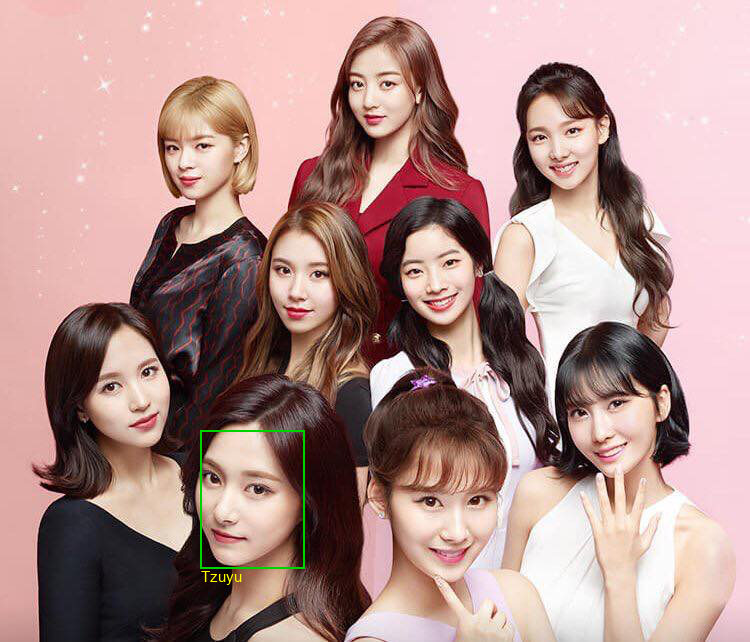

In [16]:
from PIL import ImageFont

image = Image.open("twice_group.jpg")
image_width,image_height  = image.size 
   
for face in all_faces:
    box=face['BoundingBox']
    x1 = box['Left'] * image_width
    y1 = box['Top'] * image_height
    x2 = x1 + box['Width'] * image_width
    y2 = y1 + box['Height']  * image_height
    image_crop = image.crop((x1,y1,x2,y2))
    
    stream = io.BytesIO()
    image_crop.save(stream,format="JPEG")
    image_crop_binary = stream.getvalue()

    response = rekognition.search_faces_by_image(
            CollectionId=collectionId,
            Image={'Bytes':image_crop_binary}                                       
            )
    
    if len(response['FaceMatches']) > 0:
        draw = ImageDraw.Draw(image)
        points = (
                    (x1,y1),
                    (x2, y1),
                    (x2, y2),
                    (x1 , y2),
                    (x1, y1)

                )
        draw.line(points, fill='#00d400', width=2)
        fnt = ImageFont.truetype('/Library/Fonts/Arial.ttf', 15)
        draw.text((x1,y2),response['FaceMatches'][0]['Face']['ExternalImageId'], font=fnt, fill=(255, 255, 0))
        display(image)

# Identifying All Members of Twice

In [17]:
collectionId='twice'
rekognition.create_collection(CollectionId=collectionId)

{'CollectionArn': 'aws:rekognition:eu-west-1:737987364333:collection/twice',
 'FaceModelVersion': '4.0',
 'ResponseMetadata': {'HTTPHeaders': {'connection': 'keep-alive',
   'content-length': '117',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Sat, 25 May 2019 06:46:54 GMT',
   'x-amzn-requestid': 'e2375509-7eb8-11e9-8942-efd7ee1db3f2'},
  'HTTPStatusCode': 200,
  'RequestId': 'e2375509-7eb8-11e9-8942-efd7ee1db3f2',
  'RetryAttempts': 0},
 'StatusCode': 200}

In [18]:
import os

path = 'Twice'

# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if file != '.DS_Store':
            sourceFile = os.path.join(r,file)
            imageSource=open(sourceFile,'rb')
            rekognition.index_faces(Image={'Bytes':imageSource.read()},ExternalImageId=file.split('_')[0],CollectionId=collectionId)

In [19]:
rekognition.describe_collection(CollectionId=collectionId)

{'CollectionARN': 'arn:aws:rekognition:eu-west-1:737987364333:collection/twice',
 'CreationTimestamp': datetime.datetime(2019, 5, 25, 7, 46, 54, 617000, tzinfo=tzlocal()),
 'FaceCount': 36,
 'FaceModelVersion': '4.0',
 'ResponseMetadata': {'HTTPHeaders': {'connection': 'keep-alive',
   'content-length': '156',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Sat, 25 May 2019 06:47:48 GMT',
   'x-amzn-requestid': '024c1239-7eb9-11e9-a1a3-ef0b319aada6'},
  'HTTPStatusCode': 200,
  'RequestId': '024c1239-7eb9-11e9-a1a3-ef0b319aada6',
  'RetryAttempts': 0}}

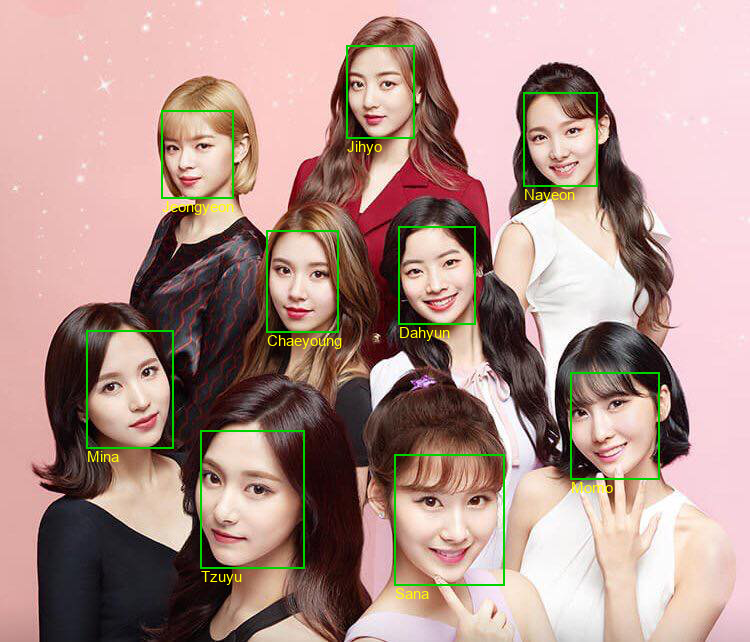

In [20]:
from PIL import ImageFont

image = Image.open("twice_group.jpg")
image_width,image_height  = image.size 
   
for face in all_faces:
    box=face['BoundingBox']
    x1 = box['Left'] * image_width
    y1 = box['Top'] * image_height
    x2 = x1 + box['Width'] * image_width
    y2 = y1 + box['Height']  * image_height
    image_crop = image.crop((x1,y1,x2,y2))
    
    stream = io.BytesIO()
    image_crop.save(stream,format="JPEG")
    image_crop_binary = stream.getvalue()

    response = rekognition.search_faces_by_image(
            CollectionId=collectionId,
            Image={'Bytes':image_crop_binary}                                       
            )
    
    if len(response['FaceMatches']) > 0:
        draw = ImageDraw.Draw(image)
        points = (
                    (x1,y1),
                    (x2, y1),
                    (x2, y2),
                    (x1 , y2),
                    (x1, y1)

                )
        draw.line(points, fill='#00d400', width=2)
        fnt = ImageFont.truetype('/Library/Fonts/Arial.ttf', 15)
        draw.text((x1,y2),response['FaceMatches'][0]['Face']['ExternalImageId'], font=fnt, fill=(255, 255, 0))

display(image)

In [ ]:
rekognition.delete_collection(CollectionId='test-collection')
rekognition.delete_collection(CollectionId='twice')